In [69]:
# data processing
import pandas as pd

# machine learning library for creating a CNN
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [98]:
len(x_test)

10000

1


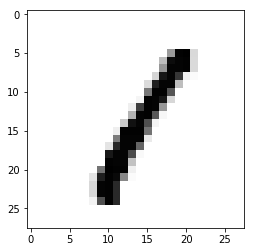

In [71]:
import matplotlib.pyplot as plt
image_index = 3 # goes up to 41,999
print(y_train[image_index]) # The label is 4
plt.imshow(x_train[image_index], cmap='Greys')

In [72]:
x_train.shape

(60000, 28, 28)

In [84]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [74]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [76]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [77]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 60s 998us/step - loss: 0.2178 - acc: 0.9351
Epoch 2/10
60000/60000 [==============================] - 60s 994us/step - loss: 0.0861 - acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0595 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 60s 995us/step - loss: 0.0456 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 60s 998us/step - loss: 0.0381 - acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 60s 997us/step - loss: 0.0285 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 60s 996us/step - loss: 0.0255 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 60s 998us/step - loss: 0.0225 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 60s 996us/step - loss: 0.0193 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.01

In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 454us/step


[0.0568651211019569, 0.9856]

9


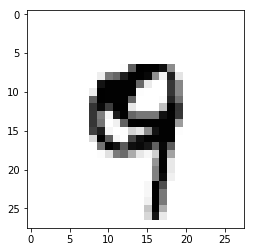

In [30]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

8


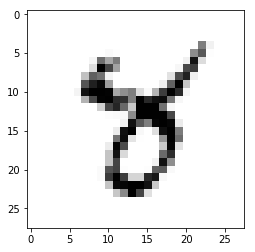

In [31]:
image_index = 4419
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

7


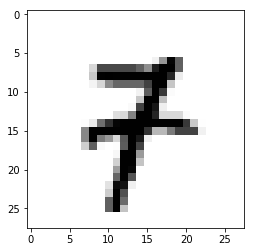

In [32]:
image_index = 4423
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

6


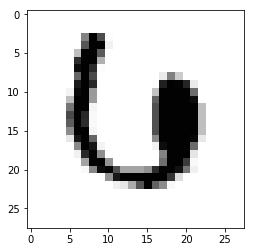

In [33]:
image_index = 1444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

5


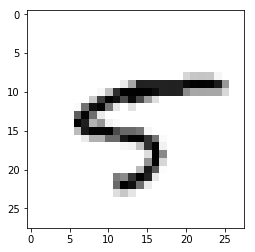

In [34]:
image_index = 2134
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

4


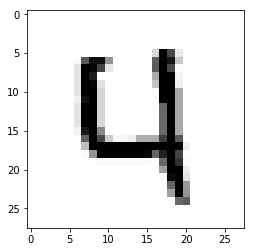

In [35]:
image_index = 4421
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

3


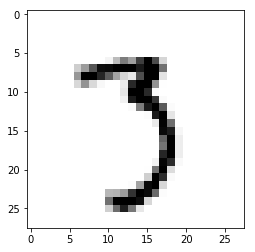

In [36]:
image_index = 1310
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

2


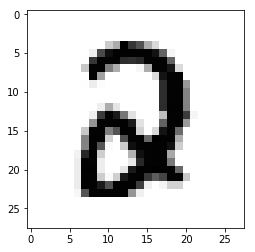

In [37]:
image_index = 1303
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

1


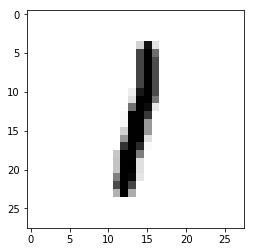

In [38]:
image_index = 1316
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [85]:
Y_pred = model.predict(x_test)

In [97]:
answers = []
for idx, items in enumerate(Y_pred):
    answers.append(Y_pred[idx].argmax())
# print(answers)
len(answers)

10000

In [95]:
# dataframe creation help
import numpy as np

# Build answer df
answer_df = pd.DataFrame({
    'ImageID': np.arange(0,27999,1)
})

answer_df['Label'] = answers;

answer_df.head(25)

# # Send to CSV file
# answer_df.to_csv('answers/answers.csv', index=False)

ValueError: Length of values does not match length of index